In [1]:
import numpy as np
import pandas as pd

In [2]:
cnt = 0
results = {}
ans = []

In [3]:
def dfs(state, cur):
    global cnt, results, ans
    if tuple(state) in results.keys():
        return
    cnt += 1
    ans.append(tuple(state))
    ex_states = ex(state)
    for ex_state in ex_states:
        results[tuple(ex_state)] = True
    if is_win(state):
        return
    for i in range(0,9):
        if state[i] == 0:
            state[i] = 1 if cur else 2
            dfs(state, not cur)
            state[i] = 0


In [4]:
def ex(state):
    ex_states = []
    ex_strategys = [[0,1,2,3,4,5,6,7,8],
                  [2,1,0,5,4,3,8,7,6],
                  [6,7,8,3,4,5,0,1,2],
                  [8,5,2,7,4,1,6,3,0],
                  [0,3,6,1,4,7,2,5,8],
                  [6,3,0,7,4,1,8,5,2],
                  [8,7,6,5,4,3,2,1,0],
                  [2,5,8,1,4,7,0,3,6]]
    for strategy in ex_strategys:
        ex_states.append(tuple(rearrange(state,strategy)))
    return ex_states
                

In [5]:
def is_win(state):
    win_strategys = [[0,1,2],[3,4,5],[6,7,8],[0,3,6],[1,4,7],[2,5,8],[0,4,8],[2,4,6]]
    for strategy in win_strategys:
        if is_equal(state,strategy):
            return True
    return False

In [6]:
def rearrange(a,arrange):
    ret = []
    for i in arrange:
        ret.append(a[i])
    return ret

In [7]:
def is_equal(a, indexes):
    for i in indexes:
        if not a[i] or a[i] != a[indexes[0]]:
            return False
    return True

In [59]:
#Player logic
#If statement of util_bot to play with developed bot instead of random.
#TODO fix

def rand_add(state,player, util_bot):
    winner = np.NaN
    game_over = False
    zeros = state == 0
    
    zeros_out = np.where(zeros)[0]

    if(zeros_out.any() == True):

        if(util_bot == True & player == 1):
            #print(player)
            move = util_player(state,1)

        else:
            move = np.random.choice(zeros_out)

        state[move] = player

        if(is_win(state) == True):
            winner = player
            game_over = True
    else:
        #print("tie!")
        move = 0
        winner = 0
        game_over = True
    return state, move, player, winner, game_over

In [60]:
#Play a game to completion.

def play_game(start_state, util_bot):
    i = 1
    won_test = False
    results = []
    while(won_test == False):
        i += 1
        state_out = rand_add(start_state, (i % 2)+1,util_bot)
        results.append([tuple(state_out[0]),state_out[1],state_out[2],state_out[3]])
        won_test = state_out[4]
        #print(state_out)
    return results

In [61]:
#Generate data for game play

def evaluate_results(results,base_set,game_num, disc):
    
    df = results
    u = []
    s = []

    if(df.get(3)[df.shape[0]-1]==2):
        #print("loss")
        val = -10
        
        for i in range(0,df.shape[0]):
            s.append(list(set(base_set) & set(ex(df.get(0)[i]))))
            #print(s)
            u.append(val)
            val = val * disc

    elif(df.get(3)[df.shape[0]-1]==1):
        #print("win")
        val = 10
        for i in range(0,df.shape[0]):
            s.append(list(set(base_set) & set(ex(df.get(0)[i]))))

            u.append(val)
            val = val * disc

    else:
        #print("tie")
        val = 0
        for i in range(0,df.shape[0]):
            s.append(list(set(base_set) & set(ex(df.get(0)[i]))))

            u.append(val)
            val = val * disc

    df["u"] = u[::-1]
    df["s"] = s    
    df["game"] = game_num

    return(df)

In [62]:
#Function to play the best utility move.
#Requires 'results3aa' to have utilities.
#Can either run random play or read in csv with utilities.

def util_player(state, player):
    val = state
    #print(val)
    start_state = np.array(val)

    zeros = start_state == 0

    zeros_out = np.where(zeros)[0]

    moves = []
    best = []
    for space in zeros_out:
        state_new = np.array(val)
        
        state_new[space] = player
        state_new_off = str(list(set(set1) & set(ex(state_new))))
        res = results3aa.filter(like = state_new_off, axis = 0)
        best_temp = [state_new,space,res[0]]
        best.append(best_temp)

    best = pd.DataFrame(best)
    best1 = best[[1,2]]
    move = int(best1.loc[best[2] == max(best[2])][1].iloc[0])
    #print(best)
    return move

In [ ]:
# Initialize ans and dataframe
results1a = pd.DataFrame()
dfs([0,0,0,0,0,0,0,0,0],True)

# Play random games of ttt
# This generates


for i in range(0,10000):
    set1 = tuple(ans)
    state_temp = np.array([0,0,0,0,0,0,0,0,0])
    res_temp = pd.DataFrame(play_game(state_temp,False))
    #print(res_temp)
    out = evaluate_results(res_temp, set1,i,0.95)
    results1a = results1a.append(out)

results2aa = results1a.astype({"s": str})

results3aa = results2aa.groupby('s')['u'].mean()

In [65]:
# Play a single game of ttt
dfs([0,0,0,0,0,0,0,0,0],True)

state_temp = np.array([0,0,0,0,0,0,0,0,0])

set1 = tuple(ans)
play_game(state_temp,True)

[[(0, 0, 0, 0, 1, 0, 0, 0, 0), 4, 1, nan],
 [(2, 0, 0, 0, 1, 0, 0, 0, 0), 0, 2, nan],
 [(2, 1, 0, 0, 1, 0, 0, 0, 0), 1, 1, nan],
 [(2, 1, 0, 2, 1, 0, 0, 0, 0), 3, 2, nan],
 [(2, 1, 0, 2, 1, 0, 0, 1, 0), 7, 1, 1]]

In [66]:
#Head of the results dataframe

results1a.head()

,0,1,2,3,u,s,game
0,"(0, 0, 0, 0, 1, 0, 0, 0, 0)",4,1,NaN,7.350919,"[(0, 0, 0, 0, 1, 0, 0, 0, 0)]",0
1,"(0, 0, 0, 0, 1, 2, 0, 0, 0)",5,2,NaN,7.737809,"[(0, 2, 0, 0, 1, 0, 0, 0, 0)]",0
2,"(0, 0, 1, 0, 1, 2, 0, 0, 0)",2,1,NaN,8.145062,"[(1, 2, 0, 0, 1, 0, 0, 0, 0)]",0
3,"(0, 0, 1, 0, 1, 2, 2, 0, 0)",6,2,NaN,8.573750,"[(1, 2, 0, 0, 1, 0, 0, 0, 2)]",0
4,"(0, 0, 1, 0, 1, 2, 2, 0, 1)",8,1,NaN,9.025000,"[(1, 2, 1, 0, 1, 0, 2, 0, 0)]",0


<AxesSubplot:>

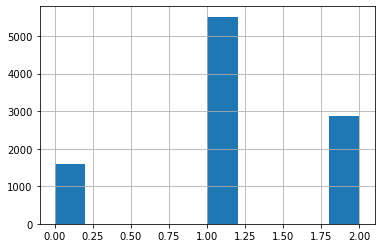

In [28]:
# Results of random game play
# 0 ~ tie, 1 ~ X win, 2 ~ O win

winners = results1a[3].dropna()

winners.hist()

In [128]:
#results3aa.to_csv("good_util.csv")

In [70]:
# Play bot games against random player.
# Initiallize at all 0 or equal number of 1 and 2.
# Need to allow for player 2 to run

results_smort = pd.DataFrame()

for i in range(0,1000):
    set1 = tuple(ans)
    state_temp = np.array([0,0,0,0,0,0,0,0,0])
    res_temp = pd.DataFrame(play_game(state_temp,True))
    #print(res_temp)
    out = evaluate_results(res_temp, set1,i,0.95)
    results_smort = results_smort.append(out)

<AxesSubplot:>

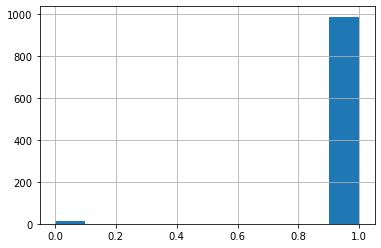

In [71]:
# Results of smart bot game play
# 0 ~ tie, 1 ~ X win, 2 ~ O win

winners_smort = results_smort[3].dropna()

winners_smort.hist()

In [745]:
def print_state(state):#################################################
    model = "{0[0]} | {0[1]} | {0[2]}\n----------\n{0[3]} | {0[4]} | {0[5]}\n----------\n{0[6]} | {0[7]} | {0[8]}"
    temp = []
    for i in state:
        if i == 0:
            temp.append(" ")
        elif i == 1:
            temp.append("O")
        else:
            temp.append("X")
    print(model.format(temp))
    
    
    

In [17]:
if __name__ == "__main__":
    dfs([0,0,0,0,0,0,0,0,0], True)
    print(cnt)
    for i in range(0,len(ans)):
        print("#%d:" % (i+1))
        print_state(ans[i])

636
#1:
  |   |  
----------
  |   |  
----------
  |   |  
#2:
O |   |  
----------
  |   |  
----------
  |   |  
#3:
  | O |  
----------
  |   |  
----------
  |   |  
#4:
X | O |  
----------
  |   |  
----------
  |   |  
#5:
  | O |  
----------
X |   |  
----------
  |   |  
#6:
O | O |  
----------
X |   |  
----------
  |   |  
#7:
  | O | O
----------
X |   |  
----------
  |   |  
#8:
X | O | O
----------
X |   |  
----------
  |   |  
#9:
  | O | O
----------
X | X |  
----------
  |   |  
#10:
O | O | O
----------
X | X |  
----------
  |   |  
#11:
  | O | O
----------
X | X | O
----------
  |   |  
#12:
X | O | O
----------
X | X | O
----------
  |   |  
#13:
  | O | O
----------
X | X | O
----------
X |   |  
#14:
O | O | O
----------
X | X | O
----------
X |   |  
#15:
  | O | O
----------
X | X | O
----------
X | O |  
#16:
X | O | O
----------
X | X | O
----------
X | O |  
#17:
  | O | O
----------
X | X | O
----------
X | O | X
#18:
O | O | O
----------
X | X | O


In [18]:
ans
unique_states = pd.DataFrame(ans)
unique_states.to_csv('unique_states.csv')